In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
df = pd.read_csv('Company_Data.csv')

### EDA

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='US', ylabel='count'>

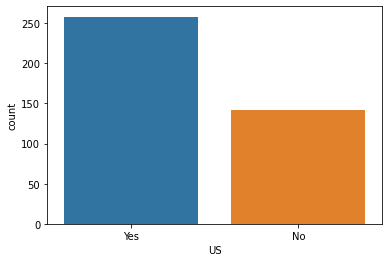

In [7]:
sns.countplot(x=df['US'])

In [8]:
print(df['ShelveLoc'].unique())

['Bad' 'Good' 'Medium']


In [9]:
print(df['US'].unique())

['Yes' 'No']


In [10]:
print(df['Urban'].unique())

['Yes' 'No']


<AxesSubplot:xlabel='Sales', ylabel='Income'>

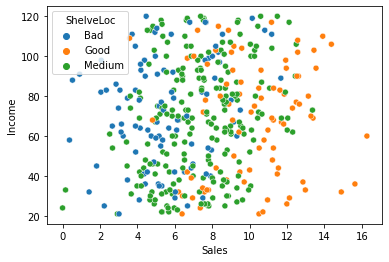

In [11]:
sns.scatterplot(x=df['Sales'],y=df['Income'],hue=df['ShelveLoc'])

# As we can see shelf's location in stores clearly influences sales.

In [12]:
def classify(Sales):
    if Sales < 7.49:
        return 'low_sales'
    else:
        return 'high_sales'
# Selecting mean value for segregation such that data set won't be imbalanced.

In [13]:
df['Sales'] = df['Sales'].apply(classify)

<AxesSubplot:xlabel='Sales', ylabel='count'>

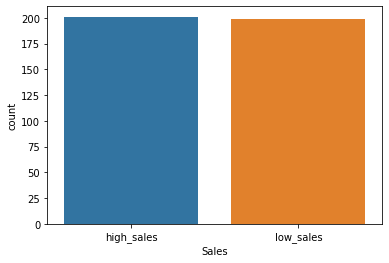

In [14]:
sns.countplot(x=df['Sales'])

<AxesSubplot:xlabel='Price', ylabel='Education'>

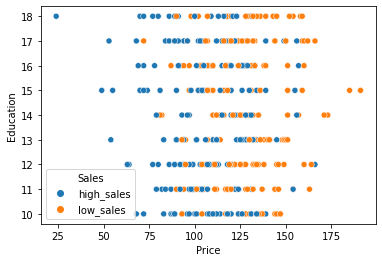

In [15]:
sns.scatterplot(x=df['Price'],y=df['Education'],hue=df['Sales'])

# There seems almost no influence of education-level on sales.

<AxesSubplot:xlabel='Advertising', ylabel='Price'>

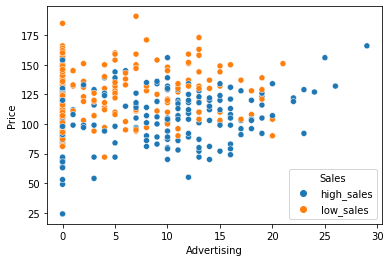

In [16]:
sns.scatterplot(x=df['Advertising'],y=df['Price'],hue=df['Sales'])

# Higher advertising budget seems to result in somewhat higher sales. 

In [17]:
enc = LabelEncoder()

In [18]:
df['ShelveLoc'] = enc.fit_transform(df['ShelveLoc'])
df['US'] = enc.fit_transform(df['US'])
df['Sales'] = enc.fit_transform(df['Sales'])
df['Urban'] = enc.fit_transform(df['Urban'])

In [19]:
X = df.drop('Sales',axis=1)
y = df['Sales'].values.reshape(-1, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=25)

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25)

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(confusion_matrix(y_test,y_pred))

[[40 12]
 [15 53]]


In [25]:
accuracy_score(y_test,y_pred)

0.775

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


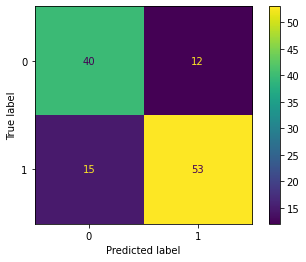

In [26]:
plot_confusion_matrix(model,X_test,y_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        52
           1       0.82      0.78      0.80        68

    accuracy                           0.78       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.78      0.78      0.78       120



In [28]:
model_2 = DecisionTreeClassifier(criterion='gini',max_depth=4)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
y_pred_2 = model.predict(X_test)
accuracy_score(y_test,y_pred_2)

# Both models give same accuracy, recall & precision.

0.775

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


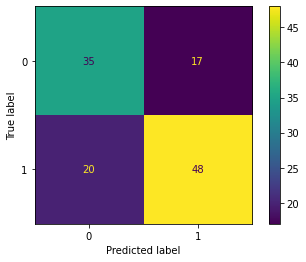

In [30]:
plot_confusion_matrix(model_2,X_test,y_test)

In [31]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        52
           1       0.82      0.78      0.80        68

    accuracy                           0.78       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.78      0.78      0.78       120



In [32]:
influncers = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [33]:
influncers

#The 3 highest attributes or features that affect the sale are 'Price', 'Shelf Location at stores' & 'Competitor Price'.

,Feature Importance
CompPrice,0.131453
Income,0.145214
Advertising,0.140341
Population,0.056671
Price,0.275015
ShelveLoc,0.129494
Age,0.061100
Education,0.033002
Urban,0.004460
US,0.023249


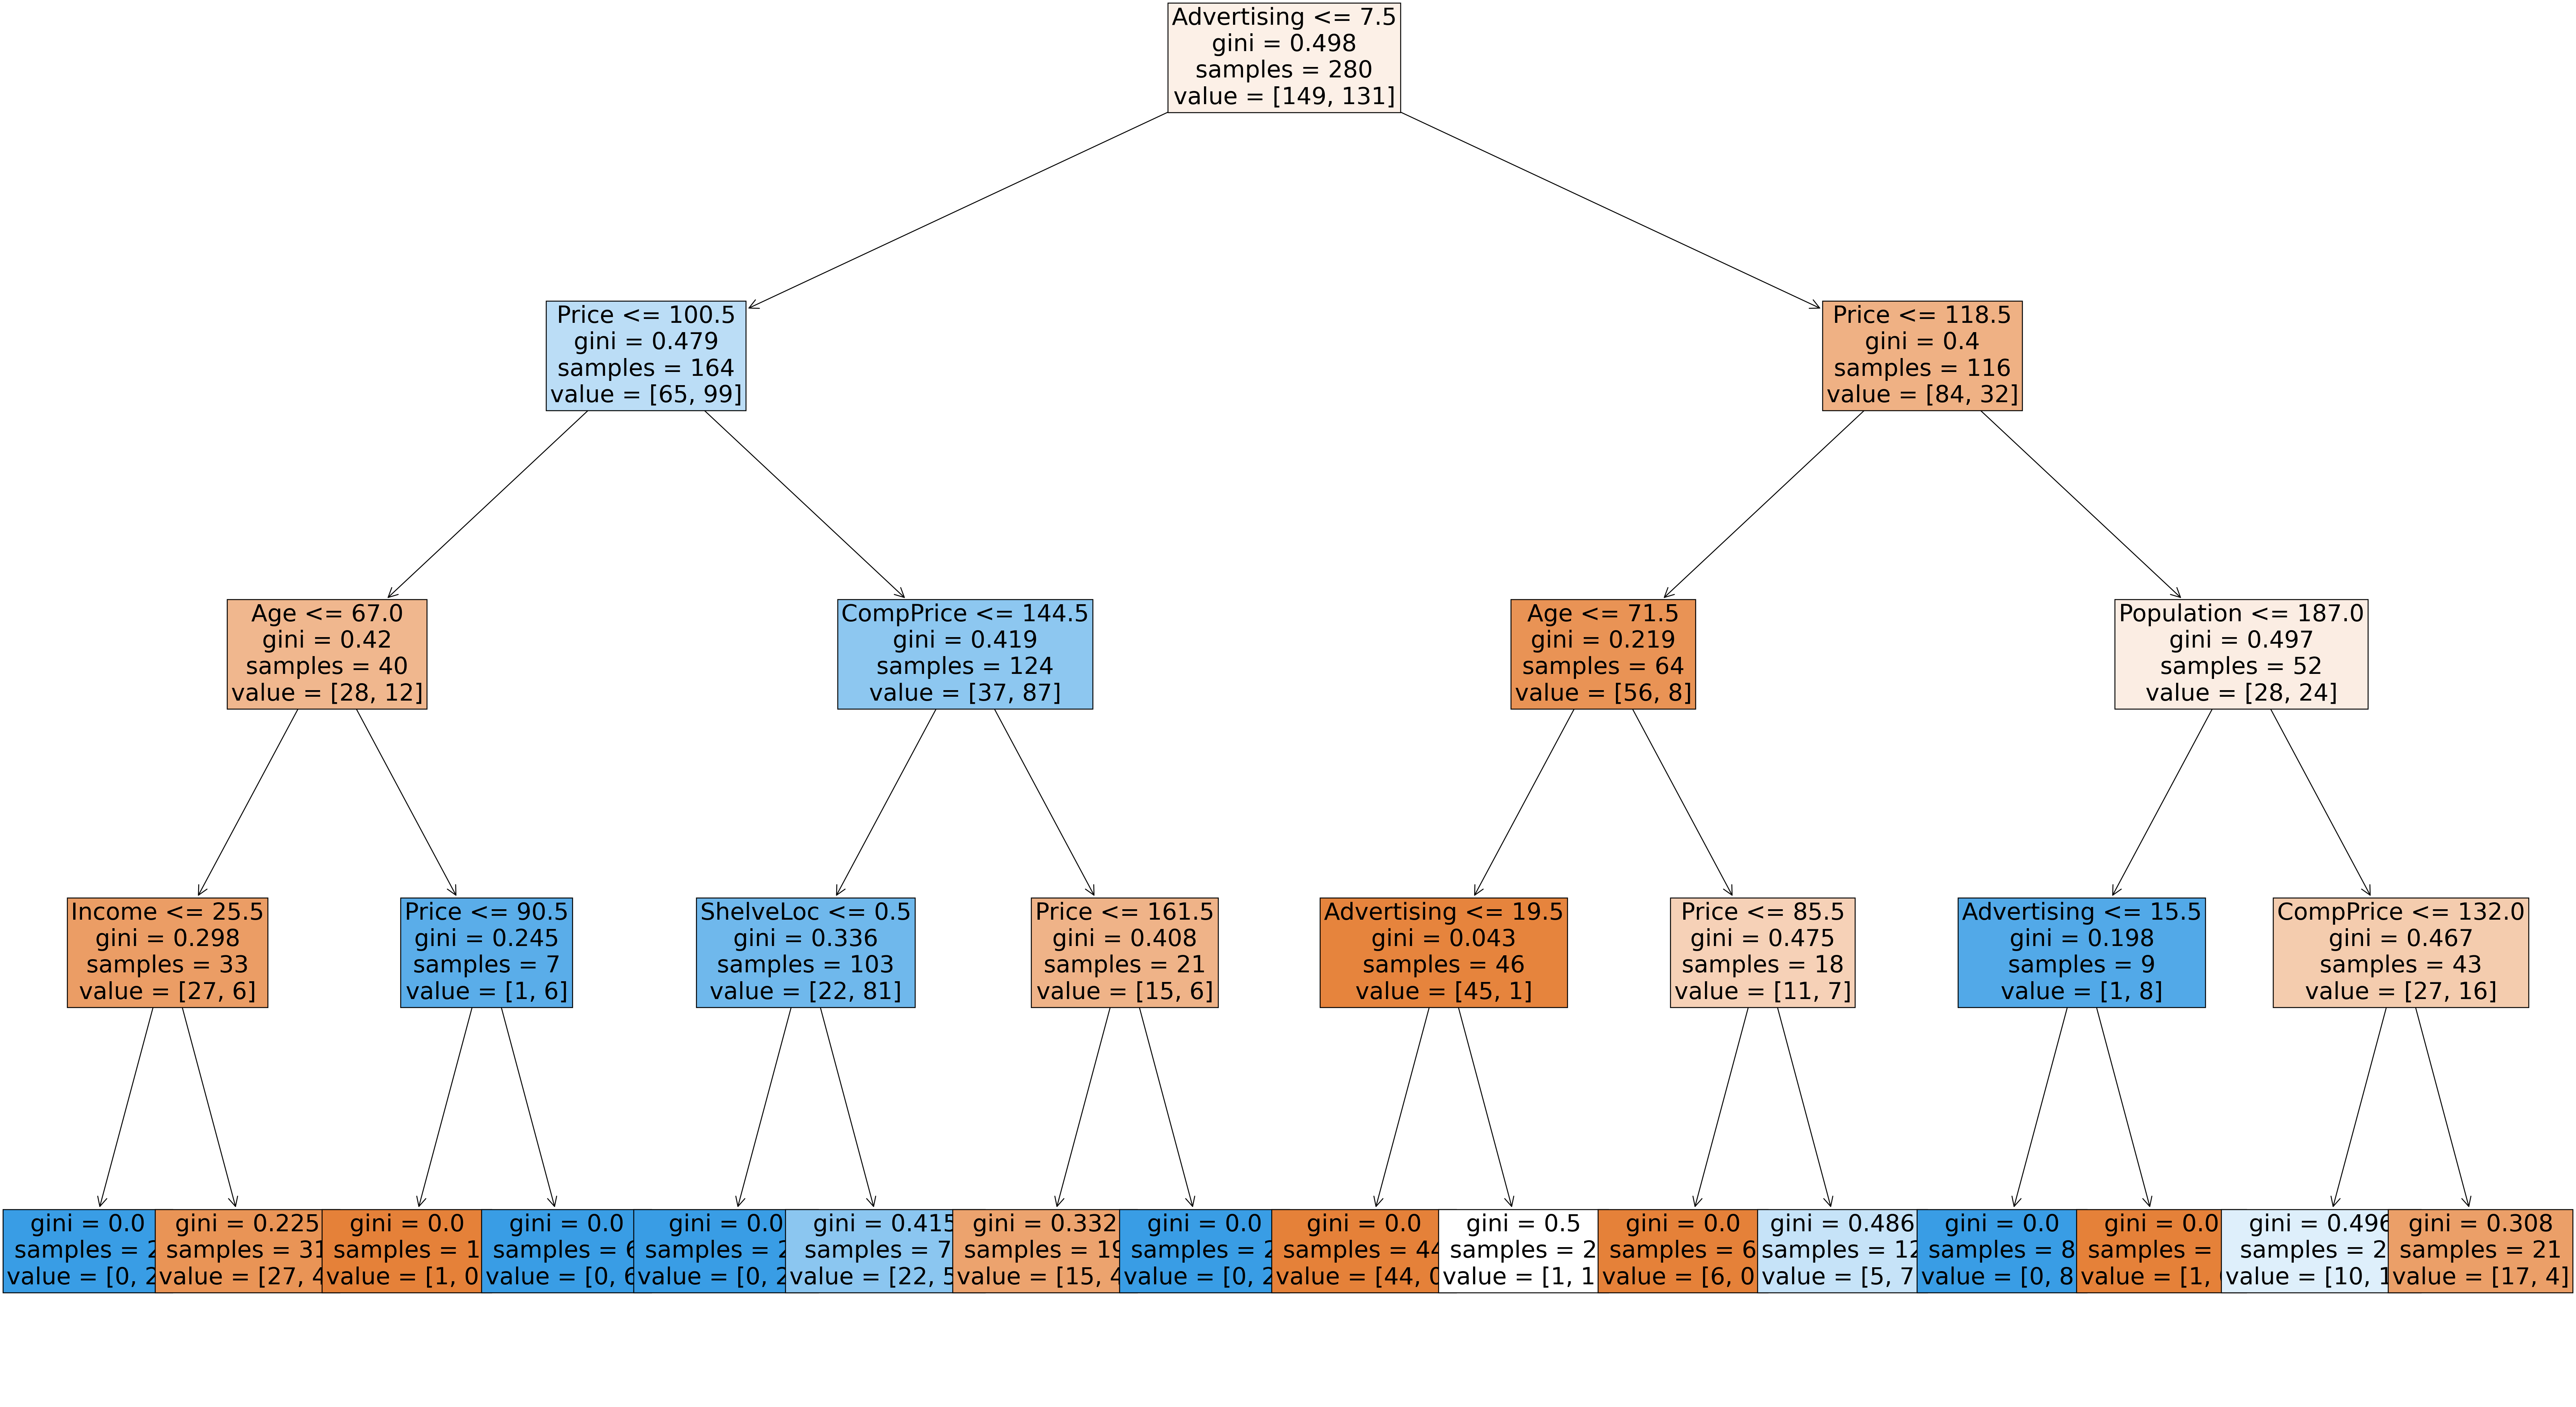

In [34]:
plt.figure(figsize=(20,12),dpi= 175)
plot_tree(model_2,filled=True,feature_names=X.columns,fontsize=25);